In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import seaborn as sns

In [2]:
!ls ../data

master_2013.csv  master_2014.csv  master.csv  simple_combined.csv


In [3]:
df = pd.read_csv('../data/master_2014.csv')
df.rename(columns={'Unnamed: 16': 'AgentString'}, inplace=True)

/playpen/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,11,13,25,87,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Columns: 117 entries, Key to AgentString
dtypes: float64(77), object(40)
memory usage: 174.9+ MB


,Key,RemoteAddr,GetTime,TrackData.ASN,TrackData.ASNAloc,TrackData.ASNBGP,TrackData.ASNCC,TrackData.ASNDsc,TrackData.ASNReg,TrackData.DevKey,...,City,Latitude,Longitude,DevKey,TestForm,AppVersionID,RequestID,TestError,TestDataKey,AgentString
0,1402185094_96.60.227.23,96.60.227.23,1402185094,4181,1203552000,96.60.0.0/15,US,"TDS-AS - TDS TELECOM,US",arin,NS-112343921464559043468-13,...,williston,33.402648,-81.420106,NS-112343921464559043468-13,Feather,0-1-0.371381188648213754,5393a58600ff00fff35213685eb50001737e6e65742d73...,NaN,1402185094_96.60.227.23,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
1,1402184959_75.175.73.32,75.175.73.32,1402184959,209,1161648000,75.160.0.0/12,US,"ASN-QWEST - Qwest Communications Company, LLC,US",arin,NS-112343921464559043468-13,...,portland,45.523452,-122.676207,NS-112343921464559043468-13,Feather,0-1-0.371381188648213754,5393a4ff0000ff058690cebd0abf0001737e6e65742d73...,NaN,1402184959_75.175.73.32,Mozilla/5.0 (Linux; U; en-us; KFTT Build/IML74...
2,1402183963_74.83.108.232,74.83.108.232,1402183963,6181,1216771200,74.83.0.0/17,US,"FUSE-NET - Cincinnati Bell Telephone,US",arin,NS-112343921464559043468-13,...,covington,39.083671,-84.508554,NS-112343921464559043468-13,Feather,0-1-0.371381188648213754,5393a11b00ff0586bc677b9e0a0001737e6e65742d7363...,NaN,1402183963_74.83.108.232,Mozilla/5.0 (iPad; CPU OS 7_1_1 like Mac OS X)...
3,1402183757_190.119.123.231,190.119.123.231,1402183757,12252,1339459200,190.119.96.0/19,PE,"America Movil Peru S.A.C.,PE",lacnic,NS-112343921464559043468-13,...,lima,-12.050000,-77.050000,NS-112343921464559043468-13,Feather,0-1-0.371381188648213754,5393a04d00ff0dd72e460ce93f0001737e6e65742d7363...,NaN,1402183757_190.119.123.231,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
4,1402183757_96.255.133.32,96.255.133.32,1402183757,701,1167350400,96.255.0.0/16,US,"UUNET - MCI Communications Services, Inc. d/b/...",arin,NS-112343921464559043468-13,...,herndon,38.969555,-77.386098,NS-112343921464559043468-13,Feather,0-1-0.371381188648213754,5393a04d00ff04a77c4371853a0001737e6e65742d7363...,NaN,1402183757_96.255.133.32,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...


In [5]:
columns = df.columns.tolist()
#columns

#TrackData.Platform, TrackData.PlatformVersion, TrackData.Mobile, Unnamed: 16

In [6]:
browsers = pd.DataFrame(df, columns=['TrackData.Platform', 'TrackData.PlatformVersion', 'TrackData.Mobile', 'AgentString'])

In [7]:
browsers.info()
browsers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Data columns (total 4 columns):
TrackData.Platform           194177 non-null object
TrackData.PlatformVersion    194177 non-null object
TrackData.Mobile             194178 non-null object
AgentString                  194179 non-null object
dtypes: object(4)
memory usage: 7.4+ MB


,TrackData.Platform,TrackData.PlatformVersion,TrackData.Mobile,AgentString
0,WINDOWS,Win32,False,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
1,LINUX,Linux armv7l,False,Mozilla/5.0 (Linux; U; en-us; KFTT Build/IML74...
2,iPad,iPad,True,Mozilla/5.0 (iPad; CPU OS 7_1_1 like Mac OS X)...
3,WINDOWS,Win32,False,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
4,MAC,MacIntel,False,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...


In [8]:
browsers['TrackData.Platform'] = browsers['TrackData.Platform'].apply(lambda x: x if type(x) is float else x.lower())
browsers['TrackData.PlatformVersion'] = browsers['TrackData.PlatformVersion'].apply(lambda x: x if type(x) is float else x.lower())

In [9]:
browsers.head()

,TrackData.Platform,TrackData.PlatformVersion,TrackData.Mobile,AgentString
0,windows,win32,False,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
1,linux,linux armv7l,False,Mozilla/5.0 (Linux; U; en-us; KFTT Build/IML74...
2,ipad,ipad,True,Mozilla/5.0 (iPad; CPU OS 7_1_1 like Mac OS X)...
3,windows,win32,False,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...
4,mac,macintel,False,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...


In [10]:
platform = browsers['TrackData.Platform']
plats = {}
for entry in platform:
    if entry not in plats and entry is not 'nan':
        plats[entry] = 0
    plats[entry] = plats[entry] + 1
other = plats.pop(plats.keys()[1], None)
plats["other"] = other

In [11]:
plats

{'android': 4,
 'blackberry': 34,
 'freebsd amd64': 2,
 'ipad': 33832,
 'iphone': 4071,
 'ipod': 666,
 'ipod touch': 491,
 'linux': 8045,
 'mac': 31350,
 'nintendo wiiu': 2,
 'nokia_series_40': 1,
 'other': 62,
 'playstation 3': 3,
 'sunos sun4u': 4,
 'symbian': 1,
 'symbian os': 1,
 'windows': 115670}

In [12]:
!pwd

/playpen/net-score-data/jamesml/net-score/notebooks


In [13]:
platform_df = pd.DataFrame.from_dict(plats, orient="index")
platform_df.columns = ['Number of tests']
platform_df = platform_df.sort(columns=['Number of tests'], ascending=False)
platform_df

,Number of tests
windows,115670
ipad,33832
mac,31350
linux,8045
iphone,4071
ipod,666
ipod touch,491
other,62
blackberry,34
sunos sun4u,4


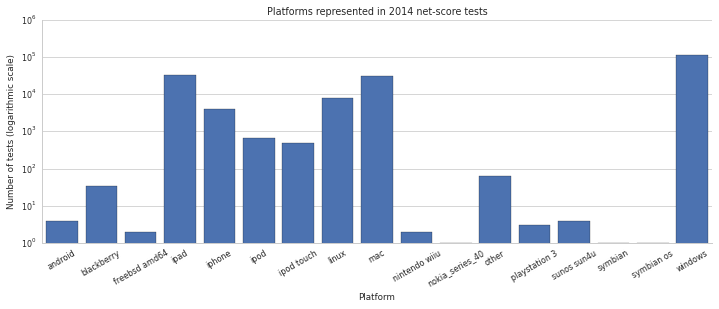

In [14]:
sns.set(style="whitegrid", context="paper", font_scale = 1)

x = np.array(platform_df.index)
y = np.array(platform_df['Number of tests'].values)

f, ax1 = plt.subplots(1,1, figsize=(12,4))
sns.barplot(x,y, ci=None, ax=ax1)
sns.axlabel("Platform", "Number of tests (logarithmic scale)")
ax1.set(yscale="log")
ax1.set_title("Platforms represented in 2014 net-score tests")
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

sns.despine()

In [15]:
renderers = {}
for entry in df['TrackData.Renderer']:
    if entry not in renderers:
        renderers[entry] = 0
    renderers[entry] = renderers[entry] + 1

In [16]:
renderers.keys()[0]
other = renderers.pop(renderers.keys()[0], None)

In [17]:
len(renderers)
renderers

{'GECKO': 24898, 'IE': 63179, 'OPERA': 180, 'OTHER': 2, 'WEBKIT': 105919}

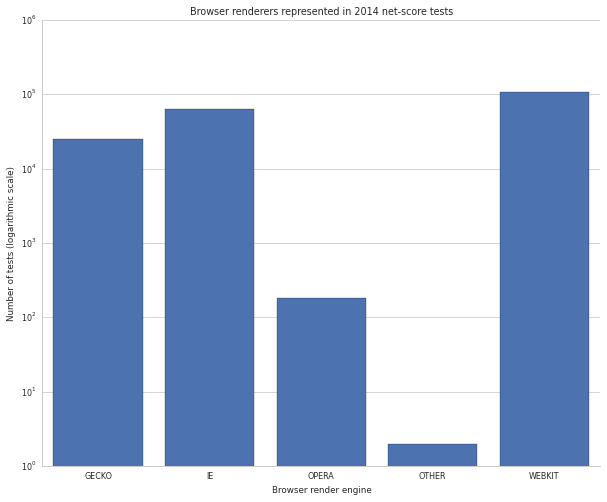

In [18]:
sns.set(style="whitegrid", context="paper", font_scale = 1)

x = np.array(renderers.keys())
y = np.array(renderers.values())

f, ax1 = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x,y, ci=None, ax=ax1)
sns.axlabel("Browser render engine", "Number of tests (logarithmic scale)")
ax1.set(yscale="log")
ax1.set_title("Browser renderers represented in 2014 net-score tests")

sns.despine()

In [19]:
rdf = pd.DataFrame(df, columns=['TrackData.Renderer', 'TrackData.RendererVersion'])

In [20]:
rdf.sort(['TrackData.Renderer', 'TrackData.RendererVersion']).dropna()

,TrackData.Renderer,TrackData.RendererVersion
24328,GECKO,1.8.1.20
21939,GECKO,1.9
22098,GECKO,1.9
22312,GECKO,1.9
23219,GECKO,1.9
25184,GECKO,1.9
26661,GECKO,1.9
27949,GECKO,1.9
28463,GECKO,1.9
29513,GECKO,1.9


In [21]:
df2013 = pd.read_csv('../data/master_2013.csv')
df2013.rename(columns={'Unnamed: 16': 'AgentString'}, inplace=True)
print df2013.info()
print "===================="
print df.info()
comb = pd.DataFrame()
l = [df, df2013]
comb = pd.concat(l)
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67915 entries, 0 to 67914
Columns: 117 entries, Key to AgentString
dtypes: float64(73), object(44)
memory usage: 61.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Columns: 117 entries, Key to AgentString
dtypes: float64(77), object(40)
memory usage: 174.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 262154 entries, 0 to 67914
Columns: 117 entries, Key to AgentString
dtypes: float64(73), object(44)
memory usage: 236.0+ MB


/playpen/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,11,13,25,61,62,63,68,87,88,104,114) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [22]:
comb.tail()

,Key,RemoteAddr,GetTime,TrackData.ASN,TrackData.ASNAloc,TrackData.ASNBGP,TrackData.ASNCC,TrackData.ASNDsc,TrackData.ASNReg,TrackData.DevKey,...,City,Latitude,Longitude,DevKey,TestForm,AppVersionID,RequestID,TestError,TestDataKey,AgentString
67910,1375679055_24.3.51.157,24.3.51.157,1375679055,7016,1065398400,24.3.0.0/16,US,CCCH-3 - Comcast Cable Communications Holdings...,arin,NS-112566280625436045021-1,...,pittsburgh,40.440625,-79.995886,NS-112566280625436045021-1,Egg,0-1-0.367552768991643092,51ff00324f00ff0d74768d57733c0001737e6e65742d73...,NaN,1375679055_24.3.51.157,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
67911,1375673205_74.196.223.175,74.196.223.175,1375673205,19108,1159315200,74.196.192.0/18,US,SUDDENLINK-COMMUNICATIONS - Suddenlink Communi...,arin,NS-112566280625436045021-1,...,pflugerville,30.439370,-97.620004,NS-112566280625436045021-1,Egg,0-1-0.367552768991643092,51ff001b7500ff043177a22549dc0001737e6e65742d73...,NaN,1375673205_74.196.223.175,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:22.0) G...
67912,1375673177_74.196.223.175,74.196.223.175,1375673177,19108,1159315200,74.196.192.0/18,US,SUDDENLINK-COMMUNICATIONS - Suddenlink Communi...,arin,NS-112566280625436045021-1,...,pflugerville,30.439370,-97.620004,NS-112566280625436045021-1,Egg,0-1-0.367552768991643092,51ff001b5900ff032d3266c846910001737e6e65742d73...,NaN,1375673177_74.196.223.175,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:22.0) G...
67913,1375665365_203.12.22.94,203.12.22.94,1375665365,7579,790560000,203.12.22.0/24,AU,INTERNEX-AS-AP InterNex Australia Pty Ltd,apnic,NS-112343921464559043468-1,...,melbourne,-37.814107,144.963280,NS-112343921464559043468-1,Egg,0-1-0.367552768991643092,51fefcd500ff08af3f7e6ca19c0001737e6e65742d7363...,NaN,1375665365_203.12.22.94,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
67914,1375664468_107.223.189.103,107.223.189.103,1375664468,7018,1335312000,107.208.0.0/12,US,"ATT-INTERNET4 - AT&T Services, Inc.",arin,NS-112566280625436045021-2,...,apex,35.732652,-78.850286,NS-112566280625436045021-2,Egg,0-1-0.367552768991643092,51fef95400ff00ff643dfdf553a50001737e6e65742d73...,NaN,1375664468_107.223.189.103,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_4)...


In [23]:
comb['TestForm'] = comb['TestForm'].apply(lambda x: str(x).lower())
nsdt = comb[comb['TestForm'] == "nsdt"]

In [24]:
nsdt.info()
nsdt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 32886 to 38195
Columns: 117 entries, Key to AgentString
dtypes: float64(73), object(44)
memory usage: 6.5+ KB


,Key,RemoteAddr,GetTime,TrackData.ASN,TrackData.ASNAloc,TrackData.ASNBGP,TrackData.ASNCC,TrackData.ASNDsc,TrackData.ASNReg,TrackData.DevKey,...,City,Latitude,Longitude,DevKey,TestForm,AppVersionID,RequestID,TestError,TestDataKey,AgentString
32886,1390419881_75.181.49.3,75.181.49.3,1390419881,7132,0,NaN,NaN,AS for SBIS-AS,NaN,NS-112343921464559043468-6,...,gastonia,35.262082,-81.187300,NaN,nsdt,0-1-0.371381188648213754,52e01faa00ff041217e18072680001737e6e65742d7363...,ErrPostTestRecord,1390419881_75.181.49.3,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
1823,1365108943_152.23.23.160,152.23.23.160,1365108943,81,776304000,152.16.0.0/12,US,NCREN - MCNC,arin,NS-112343921464559043468-11,...,chapel hill,35.913200,-79.055845,NS-112343921464559043468-11,nsdt,0-1-0.366442604649263584,515de8cd00ff04afd8b53dbbd80001737e6e65742d7363...,NaN,1365108943_152.23.23.160,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
1824,1365108906_152.23.23.160,152.23.23.160,1365108906,81,776304000,152.16.0.0/12,US,NCREN - MCNC,arin,NS-112343921464559043468-11,...,chapel hill,35.913200,-79.055845,NS-112343921464559043468-11,nsdt,0-1-0.366442604649263584,515de8a900ff03be6c69b0273a0001737e6e65742d7363...,NaN,1365108906_152.23.23.160,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
1828,1365108769_152.23.23.160,152.23.23.160,1365108769,81,776304000,152.16.0.0/12,US,NCREN - MCNC,arin,NS-112343921464559043468-11,...,chapel hill,35.913200,-79.055845,NS-112343921464559043468-11,nsdt,0-1-0.366442604649263584,515de81f00ff0395165a17552e0001737e6e65742d7363...,NaN,1365108769_152.23.23.160,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
22057,1386264981_67.128.245.131,67.128.245.131,1386264981,209,0,NaN,NaN,NOVARTIS-DMZ-US,NaN,NS-112343921464559043468-6,...,salem,38.626993,-88.945616,NaN,nsdt,0-1-0.371381188648213754,52a0b99600ff0a4930dc806f9c0001737e6e65742d7363...,ErrPostTestRecord,1386264981_67.128.245.131,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Columns: 117 entries, Key to AgentString
dtypes: float64(77), object(40)
memory usage: 174.9+ MB


In [26]:
countries = {}
for entry in df['Country']:
    if entry not in countries:
        countries[entry] = 0
    countries[entry] = countries[entry] + 1
other = countries.pop(countries.keys()[0], None)

In [27]:
countries_df = pd.DataFrame.from_dict(countries, orient="index")
countries_df.rename(columns={0: 'Count'}, inplace=True)
countries_df['FullName'] = ""
countries_df['Region'] = ""
countries_df['Subregion'] = ""

In [28]:
import requests
import json

base_url = "http://restcountries.eu/rest/v1/alpha?codes="
suffix = ";rus;no"
country = "BE"

req = base_url + country + suffix
r = requests.get(req)
j = r.json()[0]

In [29]:
base_url = "http://restcountries.eu/rest/v1/alpha?codes="
suffix = ";rus;no"

for country in countries_df.index:
    req = base_url + country + suffix
    r = requests.get(req)
    cont = ""
    fullName = ""
    if r.status_code == 200:
        j = r.json()[0]
        if not j is None:
            reg = j['region']
            sub = j['subregion']
            fullName = j['name']
        else:
            print country
            #print r.json()
    countries_df.ix[country,'FullName'] = fullName
    countries_df.ix[country,'Region'] = reg
    countries_df.ix[country,'Subregion'] = sub

A1
BU
ZZ
EU
VI


In [30]:
print len(countries_df) - 5
countries_df.head()

150


,Count,FullName,Region,Subregion
BE,52,Belgium,Europe,Western Europe
BG,51,Bulgaria,Europe,Eastern Europe
BA,8,Bosnia and Herzegovina,Europe,Southern Europe
BB,15,Barbados,Americas,Caribbean
BM,33,Bermuda,Americas,Northern America


In [31]:
l = (countries_df[countries_df['Region'] == "Americas"])['FullName'].values
print l

#Bermuda
#Puerto Rico

[u'Barbados' u'Bermuda' u'Bolivia' u'Jamaica' u'Brazil' u'The Bahamas'
 u'Belize' u'Guatemala' u'Guyana' u'Grenada' u'Honduras' u'Puerto Rico'
 u'Saint Kitts and Nevis' u'Paraguay' u'Panama' u'Peru' u'Ecuador'
 u'Cayman Islands' u'Uruguay' u'Martinique' u'Mexico' u'Falkland Islands'
 u'Nicaragua' u'Colombia' u'Chile' u'Canada' u'Costa Rica' u'Sint Maarten'
 u'El Salvador' u'Dominican Republic' u'United States' u'Saint Lucia'
 u'Trinidad and Tobago' u'Turks and Caicos Islands'
 u'Saint Vincent and the Grenadines' u'Venezuela' u'Antigua and Barbuda'
 u'Argentina']


In [32]:
regional = countries_df['Region']
regs = {}
for reg in regional:
    if reg not in regs:
        regs[reg] = 0
    regs[reg] += 1
regs.pop('', None)
print len(regs)
regs

5


{u'Africa': 19, u'Americas': 38, u'Asia': 45, u'Europe': 44, u'Oceania': 9}

In [33]:
test_counts_by_region = {}
for reg in regs:
    cir = countries_df[countries_df['Region'] == reg]
    test_counts_by_region[reg] = np.sum(cir['Count'])
test_counts_by_region

{u'Africa': 398,
 u'Americas': 165454,
 u'Asia': 2964,
 u'Europe': 10974,
 u'Oceania': 14383}

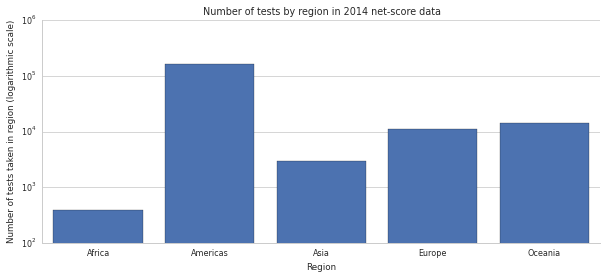

In [34]:
sns.set(style="whitegrid", context="paper", font_scale = 1)

x = np.array(test_counts_by_region.keys())
y = np.array(test_counts_by_region.values())

f, ax1 = plt.subplots(1,1, figsize=(10,4))
sns.barplot(x,y, ci=None, ax=ax1)
sns.axlabel("Region", "Number of tests taken in region (logarithmic scale)")
ax1.set_title("Number of tests by region in 2014 net-score data")
ax1.set(yscale="log")

# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)

sns.despine()

In [35]:
reg_ratios = {'Africa': 0.35185185185, 'Americas': 1.0, 'Asia': 0.9375 , 'Europe': 0.88 , 'Oceania': 0.64285714285}  

In [36]:
subregional = countries_df['Subregion']
sregs = {}
for sreg in subregional:
    if sreg not in sregs:
        sregs[sreg] = 0
    sregs[sreg] += 1
sregs.pop('', None)
sregs['Australia and NZ'] = sregs.pop('Australia and New Zealand')
print len(sregs)

21


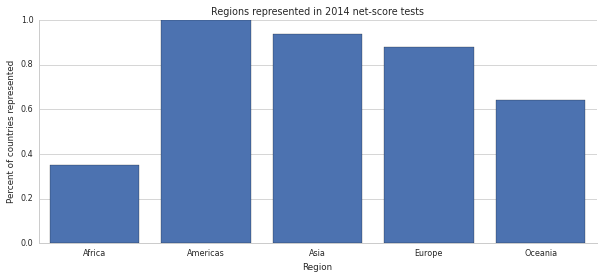

In [37]:
sns.set(style="whitegrid", context="paper", font_scale = 1)

x = np.array(reg_ratios.keys())
y = np.array(reg_ratios.values())

f, ax1 = plt.subplots(1,1, figsize=(10,4))
sns.barplot(x,y, ci=None, ax=ax1)
sns.axlabel("Region", "Percent of countries represented")
ax1.set_title("Regions represented in 2014 net-score tests")
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)

sns.despine()

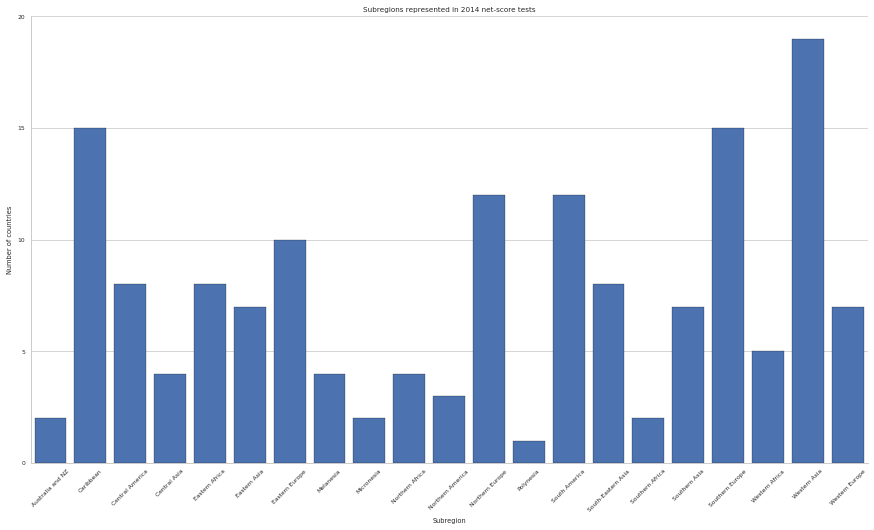

In [38]:
sns.set(style="whitegrid", context="paper", font_scale = 0.75)

x = np.array(sregs.keys())
y = np.array(sregs.values())

f, ax1 = plt.subplots(1,1, figsize=(15,8))
sns.barplot(x,y, ci=None, ax=ax1)
sns.axlabel("Subregion", "Number of countries")
ax1.set_title("Subregions represented in 2014 net-score tests")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.despine()

In [39]:
print len(df2013)
print len(df)

67915
194239


In [40]:
asns = df['TrackData.ASN']

In [41]:
asn_dict = {}
for asn in asns:
    if not asn == "nan" and not np.isnan(asn):
        if not asn in asn_dict:
            asn_dict[asn] = 0
        asn_dict[asn] += 1

In [42]:
asn_df = pd.DataFrame.from_dict(asn_dict, orient="index")
asn_df.columns = ['Count']
asn_df = asn_df.sort(columns=['Count'], ascending=False)
asn_df.head()

,Count
7018,9799
81,6942
21704,6433
701,5672
22773,5112


In [43]:
len(asn_dict) / float(21191)

0.16705205039875418

In [44]:
#7018 - ATT-INTERNET4 - AT&T Services, Inc.,US
#81 - NCREN - MCNC,US
#21704 - NYCBOE-BGPNET - New York City Board of Education,US
#701 - UUNET - MCI Communications Services, Inc. d/b/a Verizon Business,US
#22773 - ASN-CXA-ALL-CCI-22773-RDC - Cox Communications Inc.,US